In [1]:
import numpy as np
import pandas as pd
#visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from bioinfokit.visuz import cluster
#models
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_score
from sklearn.utils import resample

In [2]:
df=pd.read_csv('charge_station.csv')

In [ ]:


# Generating pie charts for the categorical columns

# Pie chart for 'state'
plt.figure(figsize=(12, 8))
state_counts = df['state'].value_counts().head(10)  # Top 10 states
state_counts.plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', 10))
plt.title('Distribution of Charging Stations by State (Top 10)')
plt.ylabel('')
plt.show()

# Pie chart for 'city'
plt.figure(figsize=(12, 8))
city_counts = df['city'].value_counts().head(10)  # Top 10 cities
city_counts.plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', 10))
plt.title('Distribution of Charging Stations by City (Top 10)')
plt.ylabel('')
plt.show()

# Pie chart for 'type'
plt.figure(figsize=(12, 8))
type_counts = df['type'].value_counts()
type_counts.plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(type_counts)))
plt.title('Distribution of Charging Station Types')
plt.ylabel('')
plt.show()



In [5]:
df

,index,name,state,city,address,lattitude,longitude,type
0,0,Neelkanth Star DC Charging Station,Haryana,Gurugram,"Neelkanth Star Karnal, NH 44, Gharunda, Kutail...",29.60,76.980300,12.0
1,1,Galleria DC Charging Station,Haryana,Gurugram,"DLF Phase IV, Sector 28, Gurugram, Haryana 122022",28.46,77.081800,12.0
2,2,Highway Xpress (Jaipur-Delhi) DC charging station,Rajasthan,Behror,"Jaipur to Delhi Road, Behror Midway, Behror, R...",27.87,76.276000,12.0
3,3,Food Carnival DC Charging Station,Uttar Pradesh,Khatauli,"Fun and Food Carnival, NH 58, Khatauli Bypass,...",29.31,77.721800,12.0
4,4,Food Carnival AC Charging Station,Uttar Pradesh,Khatauli,"NH 58, Khatauli Bypass, Bhainsi, Uttar Pradesh...",29.31,77.721800,12.0
...,...,...,...,...,...,...,...,...
1489,1542,Tata Power,Kerala,Munnar,"Gokulam Park Munnar, Power House Road, South C...",10.02,77.045859,7.0
1490,1543,Tata Power,Haryana,Gurgaon,"Vatika Town Square II, Sector 82, Sector 82, V...",28.39,76.959200,7.0
1491,1544,Tata Power,Haryana,Gurgaon,"Zedex TATA, Sec 48, GF-26, NIHO Scottish Mall,...",28.41,77.040546,7.0
1492,1545,Tata Power,Jammu,Jammu,"Le ROI, Jammu, Railway Station, Jammu, Jammu &...",32.70,74.879203,7.0


### `PCA`

In [6]:
x=df[['lattitude','longitude','type']]

In [7]:
x

,lattitude,longitude,type
0,29.60,76.980300,12.0
1,28.46,77.081800,12.0
2,27.87,76.276000,12.0
3,29.31,77.721800,12.0
4,29.31,77.721800,12.0
...,...,...,...
1489,10.02,77.045859,7.0
1490,28.39,76.959200,7.0
1491,28.41,77.040546,7.0
1492,32.70,74.879203,7.0


In [8]:
# determining the principle components
pca=PCA()
x_pca=pca.fit_transform(x)

x_pca_df = pd.DataFrame(data=x_pca, columns=[f'PC{i+1}' for i in range(x_pca.shape[1])])

print("\nImportance of Components:")
print(x_pca_df)


Importance of Components:
            PC1       PC2       PC3
0      9.233761  0.235272 -4.357052
1      8.101326  0.273521 -4.195717
2      7.651345  1.111359 -3.890824
3      8.832201 -0.437085 -4.500610
4      8.832201 -0.437085 -4.500610
...         ...       ...       ...
1489  -9.319151  1.097898  3.606993
1490   8.683344 -0.994671  0.607706
1491   8.690030 -1.074567  0.583435
1492  13.233718  0.477353  0.435270
1493  -6.169278  2.858256  3.704632

[1494 rows x 3 columns]


In [9]:
rotations = pca.components_.T

rotations_df = pd.DataFrame(rotations, columns=[f'PC{i+1}' for i in range(rotations.shape[1])], index=df.columns[:3])

rotations_df = rotations_df.round(1)

std_devs = np.sqrt(pca.explained_variance_).round(1)

print("Standard deviations (1, .., p=3):")
print(std_devs)
print("Rotation matrix (3 x 3):")
print(rotations_df)

Standard deviations (1, .., p=3):
[7.1 4.8 4. ]
Rotation matrix (3 x 3):
       PC1  PC2  PC3
index  1.0 -0.1 -0.2
name  -0.2 -1.0 -0.3
state -0.1  0.3 -1.0


#### `Explained  Varience`

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(x)


In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)  # Adjust the number of components if needed
principal_components = pca.fit_transform(scaled_data)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
total_explained_variance = explained_variance.sum()

explained_variance, total_explained_variance


(array([0.39084966, 0.35390265, 0.25524769]), 0.9999999999999999)

In [12]:
for i, variance in enumerate(explained_variance):
    print(f"Principal Component {i+1}: {variance:.4f} ({variance * 100:.2f}%)")

print(f"Total Variance Captured: {total_explained_variance:.4f} ({total_explained_variance * 100:.2f}%)")


Principal Component 1: 0.3908 (39.08%)
Principal Component 2: 0.3539 (35.39%)
Principal Component 3: 0.2552 (25.52%)
Total Variance Captured: 1.0000 (100.00%)


#### `PCA score plot`

In [13]:
pca = PCA(n_components=2)  # Reduce to 2 dimensions for the score plot
principal_components = pca.fit_transform(scaled_data)


In [15]:
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['State'] = df['state']  # Add state or any other categorical column for color coding


In [16]:
pca_df[pca_df['Principal Component 1']>2]

,Principal Component 1,Principal Component 2,State
368,6.936305,10.647367,Delhi
535,11.559195,10.438382,Karnataka
1036,11.559195,10.438382,Karnataka


In [17]:
pca_df.drop([368,535,1036],inplace=True)

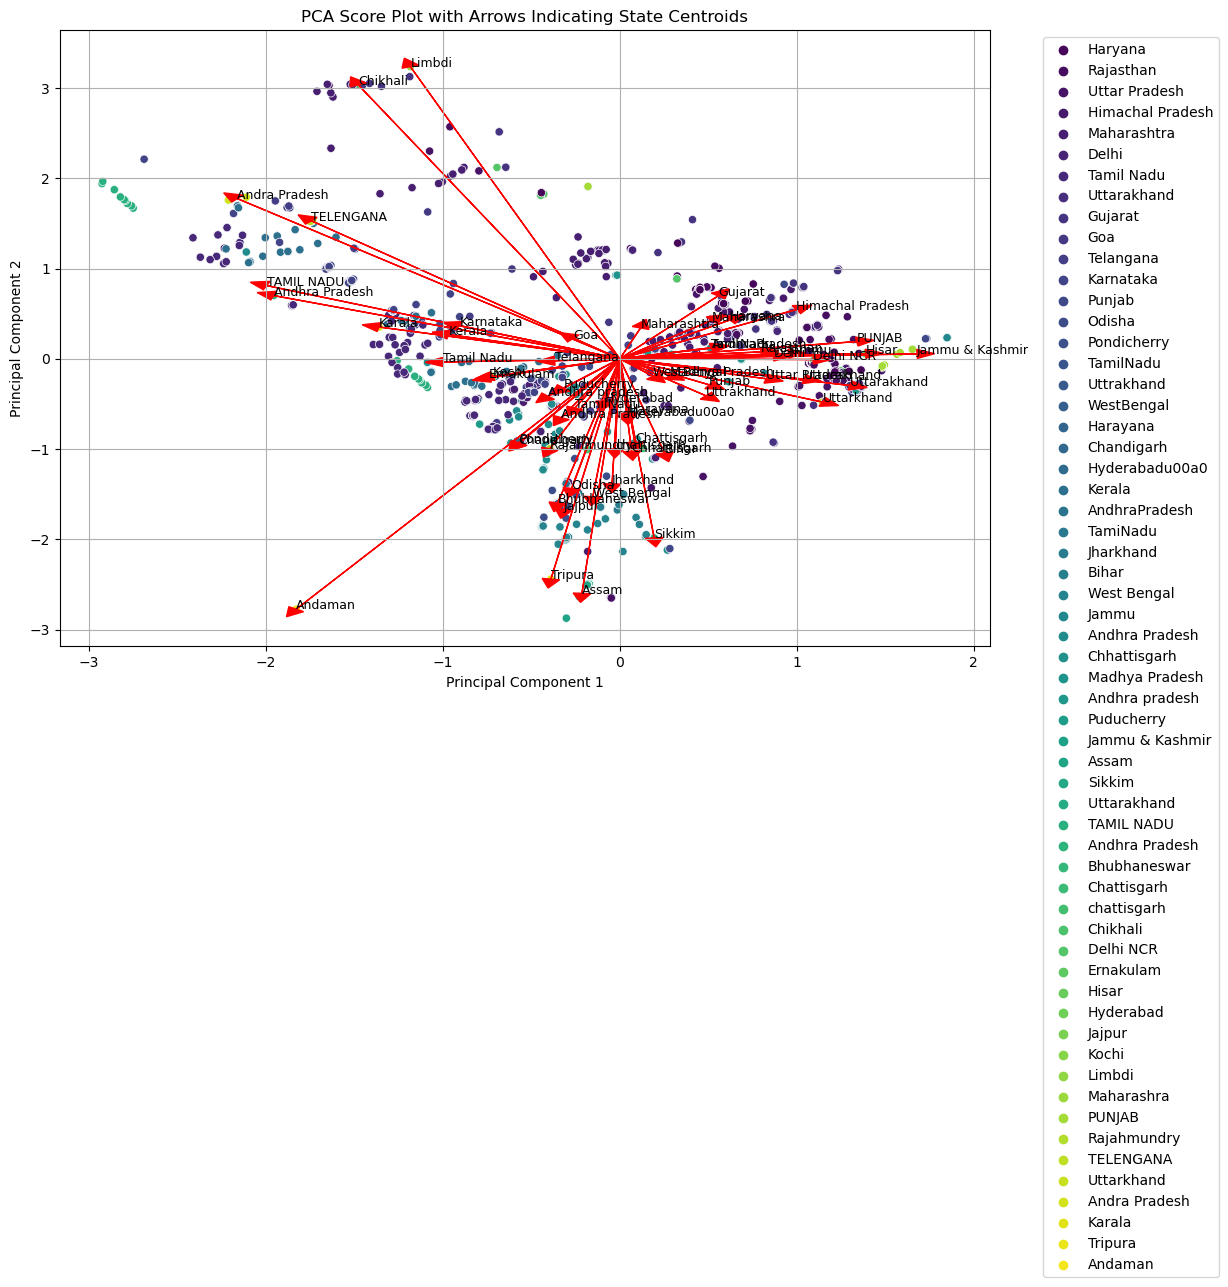

In [18]:

plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='Principal Component 1', y='Principal Component 2',
    hue='State', data=pca_df, palette='viridis', legend='full'
)

# Calculate centroids for each state
centroids = pca_df.groupby('State')[['Principal Component 1', 'Principal Component 2']].mean()

# Plot arrows from the origin to the centroids
for state, centroid in centroids.iterrows():
    plt.arrow(0, 0, centroid['Principal Component 1'], centroid['Principal Component 2'],
              head_width=0.1, head_length=0.1, fc='red', ec='red', linewidth=1)
    plt.text(centroid['Principal Component 1'], centroid['Principal Component 2'], state, fontsize=9)

plt.title('PCA Score Plot with Arrows Indicating State Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()


In [19]:
pca = PCA()    #creating the instance of class PCA
pca.fit_transform(scaled_data) 
pca.explained_variance_ratio_

array([0.39084966, 0.35390265, 0.25524769])

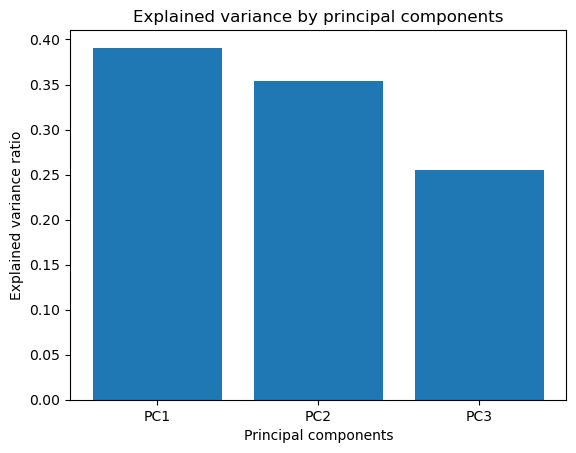

In [20]:
components=['PC1', 'PC2', 'PC3']
var_exp = pca.explained_variance_ratio_
plt.bar(components, var_exp)
plt.title('Explained variance by principal components')
plt.xlabel('Principal components')
plt.ylabel('Explained variance ratio')
plt.show()

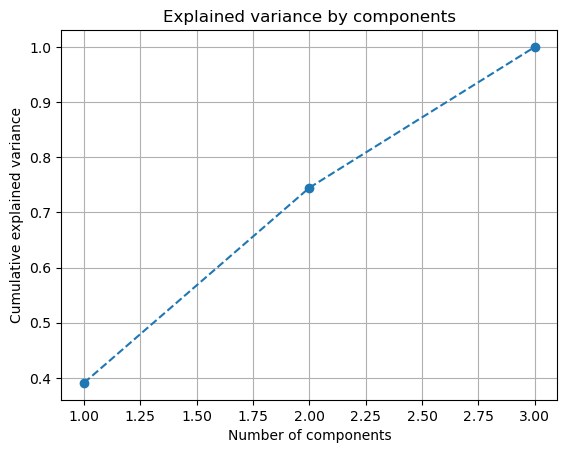

In [22]:
plt.plot(range(1,4),pca.explained_variance_ratio_.cumsum(),marker='o', linestyle='--')
plt.title('Explained variance by components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.grid()
plt.show()

### `K-Means Clustering`

In [10]:
x=df[['lattitude',	'longitude']]

In [17]:
x.drop([1509],inplace=True)

/var/folders/jj/sn9_wwps1r7bkv9sm52vv7240000gn/T/ipykernel_873/2885086709.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.drop([1509],inplace=True)


<Axes: xlabel='lattitude', ylabel='longitude'>

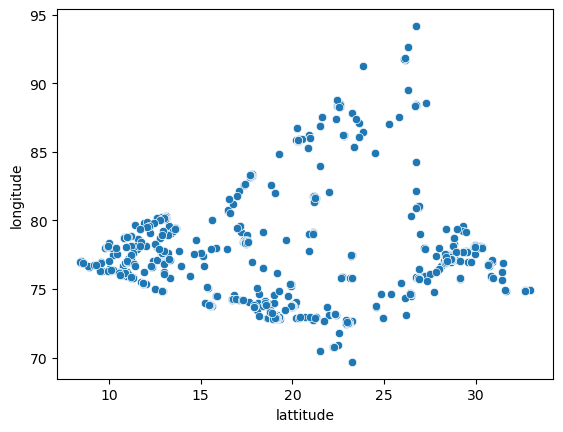

In [18]:
sns.scatterplot(data=x, x='lattitude', y='longitude')

In [23]:
pca=PCA()
x_pca=pca.fit_transform(x)

In [24]:
x_pca

array([[ 9.77574167, -1.06885813],
       [ 8.64055239, -0.92309273],
       [ 8.01965594, -1.70533389],
       ...,
       [ 8.58898559, -0.96237068],
       [12.79167003, -3.2889445 ],
       [-7.01472062, -2.55371262]])

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

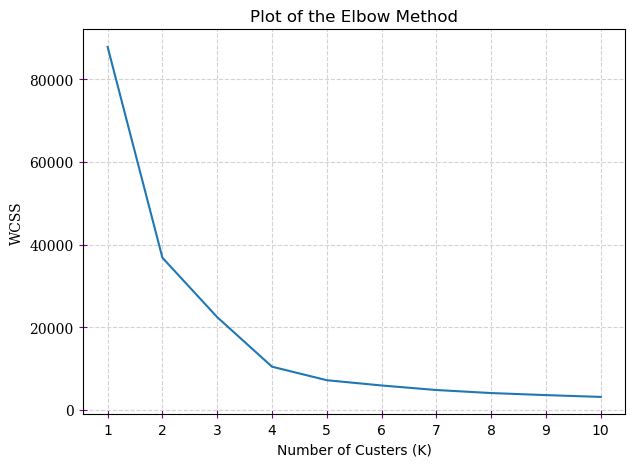

In [56]:
wcss = []

for i in range(1, 11):
  kmean = KMeans(n_clusters=i, init='k-means++', random_state=90)
  kmean.fit(x_pca)
  wcss.append(kmean.inertia_)

plt.figure(figsize=(7,5))
plt.title('Plot of the Elbow Method')
plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11))
plt.yticks(family='serif')
plt.xlabel('Number of Custers (K)')
plt.ylabel('WCSS', family='serif')
plt.grid()
plt.tick_params(axis='both', direction='inout', length=6, color='purple', grid_color='lightgray', grid_linestyle='--')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


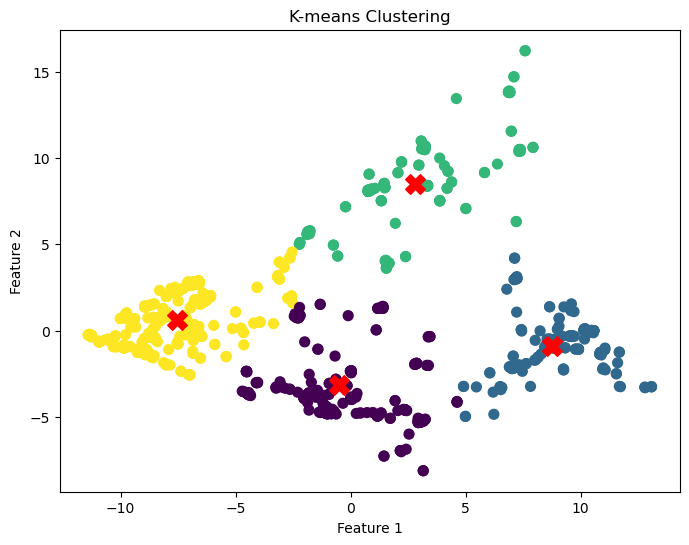

In [26]:

# Perform K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(x_pca)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plot the clusters and centroids
plt.figure(figsize=(8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [27]:
kmean = KMeans(n_clusters=4, init='k-means++', random_state=90)
kmean.fit(x_pca)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=90)

In [28]:
pd.Series(kmean.labels_).value_counts()

0    498
2    427
1    401
3    164
Name: count, dtype: int64

In [37]:
df['clusters'] = kmean.labels_

<Axes: xlabel='lattitude', ylabel='longitude'>

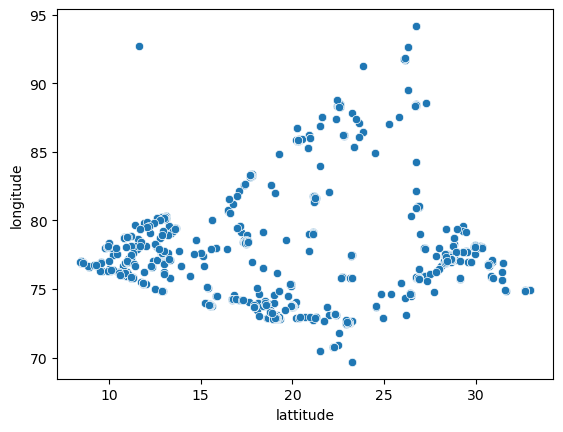

In [33]:
sns.scatterplot(data=df, x=df['lattitude'], y=df['longitude'])

In [41]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca.head()

,PC1,PC2
0,9.775742,-1.068858
1,8.640552,-0.923093
2,8.019656,-1.705334
3,9.514803,-0.316639
4,9.514803,-0.316639


In [42]:
kmean = KMeans(n_clusters=4, init='k-means++', random_state=90)
kmean.fit(X_pca)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=90)

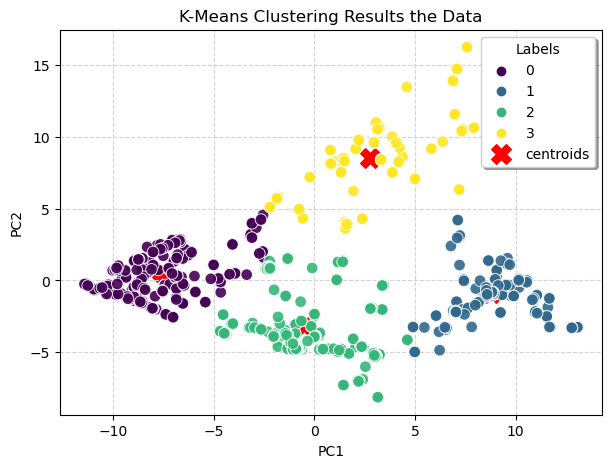

In [51]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', s=70, hue=kmean.labels_, palette='viridis', zorder=2, alpha=.9)
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X',label="centroids")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.tick_params(grid_color='lightgray', grid_linestyle='--', zorder=1)
plt.legend(title='Labels', fancybox=True, shadow=True)
plt.title('K-Means Clustering Results the Data')
plt.show()

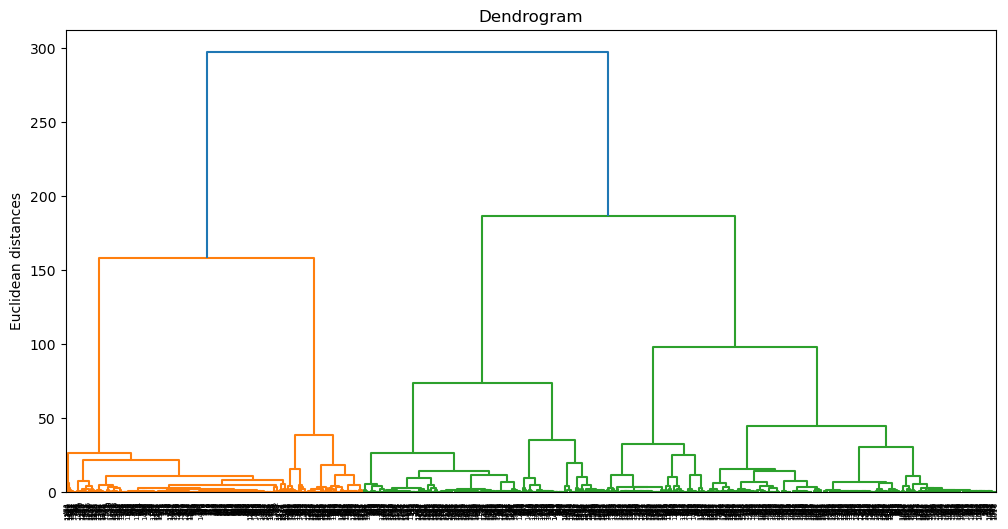

In [55]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(12,6))
dendrogram = sch.dendrogram(sch.linkage(df_pca, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('')
plt.ylabel('Euclidean distances')
plt.show()

In [57]:


df

,name,state,city,address,lattitude,longitude,type,clusters
0,Neelkanth Star DC Charging Station,Haryana,Gurugram,"Neelkanth Star Karnal, NH 44, Gharunda, Kutail...",29.60,76.980300,12.0,1
1,Galleria DC Charging Station,Haryana,Gurugram,"DLF Phase IV, Sector 28, Gurugram, Haryana 122022",28.46,77.081800,12.0,1
2,Highway Xpress (Jaipur-Delhi) DC charging station,Rajasthan,Behror,"Jaipur to Delhi Road, Behror Midway, Behror, R...",27.87,76.276000,12.0,1
3,Food Carnival DC Charging Station,Uttar Pradesh,Khatauli,"Fun and Food Carnival, NH 58, Khatauli Bypass,...",29.31,77.721800,12.0,1
4,Food Carnival AC Charging Station,Uttar Pradesh,Khatauli,"NH 58, Khatauli Bypass, Bhainsi, Uttar Pradesh...",29.31,77.721800,12.0,1
...,...,...,...,...,...,...,...,...
1542,Tata Power,Kerala,Munnar,"Gokulam Park Munnar, Power House Road, South C...",10.02,77.045859,7.0,0
1543,Tata Power,Haryana,Gurgaon,"Vatika Town Square II, Sector 82, Sector 82, V...",28.39,76.959200,7.0,1
1544,Tata Power,Haryana,Gurgaon,"Zedex TATA, Sec 48, GF-26, NIHO Scottish Mall,...",28.41,77.040546,7.0,1
1545,Tata Power,Jammu,Jammu,"Le ROI, Jammu, Railway Station, Jammu, Jammu &...",32.70,74.879203,7.0,1


In [58]:
df.reset_index(inplace=True)

In [59]:
df

,index,name,state,city,address,lattitude,longitude,type,clusters
0,0,Neelkanth Star DC Charging Station,Haryana,Gurugram,"Neelkanth Star Karnal, NH 44, Gharunda, Kutail...",29.60,76.980300,12.0,1
1,1,Galleria DC Charging Station,Haryana,Gurugram,"DLF Phase IV, Sector 28, Gurugram, Haryana 122022",28.46,77.081800,12.0,1
2,2,Highway Xpress (Jaipur-Delhi) DC charging station,Rajasthan,Behror,"Jaipur to Delhi Road, Behror Midway, Behror, R...",27.87,76.276000,12.0,1
3,3,Food Carnival DC Charging Station,Uttar Pradesh,Khatauli,"Fun and Food Carnival, NH 58, Khatauli Bypass,...",29.31,77.721800,12.0,1
4,4,Food Carnival AC Charging Station,Uttar Pradesh,Khatauli,"NH 58, Khatauli Bypass, Bhainsi, Uttar Pradesh...",29.31,77.721800,12.0,1
...,...,...,...,...,...,...,...,...,...
1485,1542,Tata Power,Kerala,Munnar,"Gokulam Park Munnar, Power House Road, South C...",10.02,77.045859,7.0,0
1486,1543,Tata Power,Haryana,Gurgaon,"Vatika Town Square II, Sector 82, Sector 82, V...",28.39,76.959200,7.0,1
1487,1544,Tata Power,Haryana,Gurgaon,"Zedex TATA, Sec 48, GF-26, NIHO Scottish Mall,...",28.41,77.040546,7.0,1
1488,1545,Tata Power,Jammu,Jammu,"Le ROI, Jammu, Railway Station, Jammu, Jammu &...",32.70,74.879203,7.0,1


In [60]:
df.to_csv('new.csv', index_label=False)